# Zero Knowledge Proofs with polynomials - following Vitalik's blog post

## resources
- https://github.com/ventali/awesome-zk?tab=readme-ov-file
- https://vitalik.eth.limo/general/2021/01/26/snarks.html
- https://vitalik.eth.limo/general/2022/06/15/using_snarks.html

## general goals
A succinct argument of knowledge (SNARK) proof alows a Prover to prove that some computation has some particular input in a way that the proof can be verified extremely quickly, even if the underlying computation is extremely expensive. We can also make a zero knowledge SNARK proof (zk-SNARK) where we can keep the inputs to the computation private.

## Plan of attack
Polynomials can be created that contain arbitrary information. For example, I can create a polynomial F(x) where F(0) is the ascii value of the first character in moby dick, F(1) is the ascii value of the 2nd, F(2) is the ascii value of the third, ...  
And an equation between polynomials can represent an arbitrary number of equations between numbers. For example, if I want to represent the equations:
- `12 + 1 = 13`
- `10 + 8 = 18`
- `15 + 8 = 23`
- `15 + 13 = 28`  

I can do that with `A(x) + B(x) = C(x)` where A gives (12, 10, 15, 15) for x input (0, 1, 2, 3) and B gives (1, 8, 8, 13) for the same input and C gives (13,18,23,28) also for that input. We can make polynomials that pass through arbitrary points with [Lagrange Interpolation](https://en.wikipedia.org/wiki/Lagrange_polynomial). After going slowly through the Lagrange interpolation definition on wikipedia, and striving to understand each part, I can understand it enough to write a program that computes the polynomial coefficients of the Lagrange Polynomial passing through each target point. 

In [36]:
# use a symbolic mathematics library to handle algebra
from sympy import *
x = symbols('x')

# returns the coefficients of the lagrange polynomial that equals target[0] at x=0, target[1] at x=1, ...
# just can't have the first taget be zero because then 0/0 error
def generate_coefficients(targets):
    # hold all l_i (functions that give 1 at x=i and zero elsewhere)
    l_formualas = []

    # i is x_j in the wiki def
    for i in range(len(targets)):
        l_i_expression = 1
    
        # do for all m where m != j
        for m in range(len(targets)):
            if m != i:
                part = (x - m) / (i - m)
                l_i_expression *= part
        l_formualas.append(l_i_expression)
    
    final = 0
    # multiply each lagrange basis polynomial by what we want the function to be at x=i (because right now it's zero)
    for i in range(len(targets)):
        final += targets[i] * l_formualas[i]
    return factor(final)

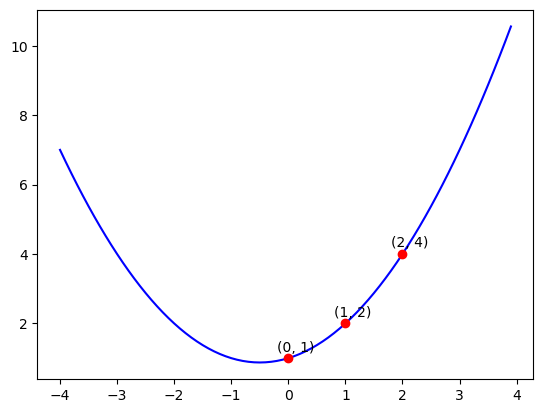

In [37]:
# visualize a polynomial
import matplotlib.pyplot as plt
import numpy as np

# we want f(0) = 1, f(1) = 2, f(2) = 4
f = generate_coefficients([1,2,4])

xs = [x for x in np.arange(-4,4,0.1)]
ys = [f.subs(x, num) for num in xs]

# Points to highlight
x_points = np.array([0, 1, 2])
y_points = [f.subs(x, xp) for xp in x_points]  # Compute function values at x = 0, 1, 2

plt.plot(xs, ys, label=f'y = {f}', color='blue')
# Scatter plot for specific points
plt.scatter(x_points, y_points, color='red', zorder=3, label='Highlighted points')

# Annotate the points with coordinates
for x, y in zip(x_points, y_points):
    plt.annotate(f"({x}, {y})", (x, y), textcoords="offset points", xytext=(5, 5), ha='center', fontsize=10, color='black')


plt.show()